In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

# Carregando os dados

In [17]:
recomendacoes=pd.read_csv('Dados/recomendacao_2010_2020.csv', sep = ';', low_memory=False)

In [18]:
recomendacoes

,codigo_ocorrencia4,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
0,39115,095/2011,2011-07-21,2011-08-01,2015-12-21,Revisar os requisitos de experiência recente p...,NÃO CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1,39115,096/2011,2011-07-21,2011-08-01,2011-09-16,Divulgar o presente relatório final aos operad...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
2,39156,063/2011,2011-06-30,2011-08-01,2011-09-12,Divulgar este Relatório aos operadores de aero...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
3,39156,064/2011,2011-06-30,2011-08-01,2014-04-16,Acompanhar junto à autoridade primária de cert...,CUMPRIDA DE FORMA ALTERNATIVA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
4,39235,205/2011,2011-08-29,2011-09-29,2012-11-06,Realizar uma vistoria de segurança de voo na A...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
...,...,...,...,...,...,...,...,...,...
1737,79397,A-074/CENIPA/2020 - 01,2021-02-12,2021-02-27,NaN,"Atuar junto à Aero Agrícola Cambará Ltda., com...",AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1738,79397,A-074/CENIPA/2020 - 02,2021-02-12,2021-02-27,NaN,"Atuar junto à Aero Agrícola Cambará Ltda., a f...",AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1739,79397,A-074/CENIPA/2020 - 03,2021-02-12,2021-02-27,NaN,Divulgar os ensinamentos colhidos na presente ...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1740,79665,IG-118/CENIPA/2019 -01,2020-10-29,2020-11-27,2021-01-07,Atuar junto à organização de manutenção Quick ...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL


In [19]:
print(recomendacoes.columns.values)

['codigo_ocorrencia4' 'recomendacao_numero' 'recomendacao_dia_assinatura'
 'recomendacao_dia_encaminhamento' 'recomendacao_dia_feedback'
 'recomendacao_conteudo' 'recomendacao_status'
 'recomendacao_destinatario_sigla' 'recomendacao_destinatario']


In [20]:
recomendacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   codigo_ocorrencia4               1742 non-null   int64 
 1   recomendacao_numero              1742 non-null   object
 2   recomendacao_dia_assinatura      1742 non-null   object
 3   recomendacao_dia_encaminhamento  1742 non-null   object
 4   recomendacao_dia_feedback        952 non-null    object
 5   recomendacao_conteudo            1741 non-null   object
 6   recomendacao_status              1742 non-null   object
 7   recomendacao_destinatario_sigla  1742 non-null   object
 8   recomendacao_destinatario        1742 non-null   object
dtypes: int64(1), object(8)
memory usage: 122.6+ KB


In [21]:
recomendacoes.duplicated().sum()

0

# Removendo a coluna recomendacao_dia_feedback e a linha cujo recomendacao_conteudo está vazio  

In [22]:
recomendacoes_filtrada = recomendacoes.drop(['recomendacao_dia_feedback'], axis = 1)
recomendacoes_filtrada = recomendacoes_filtrada[recomendacoes_filtrada['recomendacao_conteudo'].notna()]
recomendacoes_filtrada

,codigo_ocorrencia4,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
0,39115,095/2011,2011-07-21,2011-08-01,Revisar os requisitos de experiência recente p...,NÃO CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1,39115,096/2011,2011-07-21,2011-08-01,Divulgar o presente relatório final aos operad...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
2,39156,063/2011,2011-06-30,2011-08-01,Divulgar este Relatório aos operadores de aero...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
3,39156,064/2011,2011-06-30,2011-08-01,Acompanhar junto à autoridade primária de cert...,CUMPRIDA DE FORMA ALTERNATIVA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
4,39235,205/2011,2011-08-29,2011-09-29,Realizar uma vistoria de segurança de voo na A...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
...,...,...,...,...,...,...,...,...
1737,79397,A-074/CENIPA/2020 - 01,2021-02-12,2021-02-27,"Atuar junto à Aero Agrícola Cambará Ltda., com...",AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1738,79397,A-074/CENIPA/2020 - 02,2021-02-12,2021-02-27,"Atuar junto à Aero Agrícola Cambará Ltda., a f...",AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1739,79397,A-074/CENIPA/2020 - 03,2021-02-12,2021-02-27,Divulgar os ensinamentos colhidos na presente ...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1740,79665,IG-118/CENIPA/2019 -01,2020-10-29,2020-11-27,Atuar junto à organização de manutenção Quick ...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL


# Observando quais palavras são mais relevantes no conteúdo das recomendações das ocorrências

In [31]:
def nuvem_palavras(coluna_dataframe):
    
    palavras = ''
    stopwords= set(STOPWORDS)

    # Lista de palavras que não serão contabilizadas
    novas_palavras = ["de", "da", "do", "para", "dos", "das", 
                     "em", "por", "registro", "ltda", "fim", "realizar",
                     "um", "através", "na", "no", "ou", "voo", "aeronave", "aeronaves"]

    with open("stop_words_pt.txt", 'r') as f:
        [novas_palavras.append(palavras) for linha in f for palavras in linha.split()]

    nova_stopwords = stopwords.union(novas_palavras)

    for val in coluna_dataframe: 

        # converter cada linha para string 
        val = str(val) 

        # splitar cada linha em uma lista de palavras (tokens)
        tokens = val.split() 

        # Converter cada token em letra minuscula
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower() 

        palavras += " ".join(tokens)+" "

    # Formando a nunvem de palavras    
    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='white', 
                    stopwords = nova_stopwords, 
                    min_font_size = 10).generate(palavras) 

    # Plotando a imagem de nuvem de palavras                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

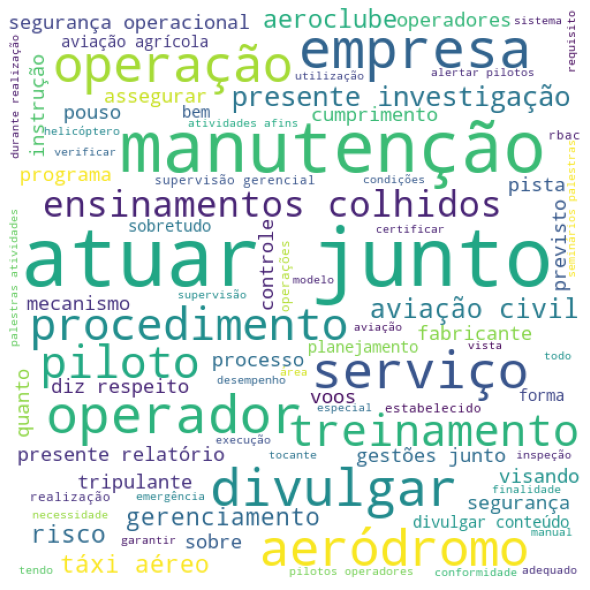

In [32]:
nuvem_palavras(recomendacoes_filtrada['recomendacao_conteudo'])